In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation, rc
from setup import *
import scipy
from scipy import ndimage
from threading import Thread
from IPython.display import HTML

(900, 900, 3)


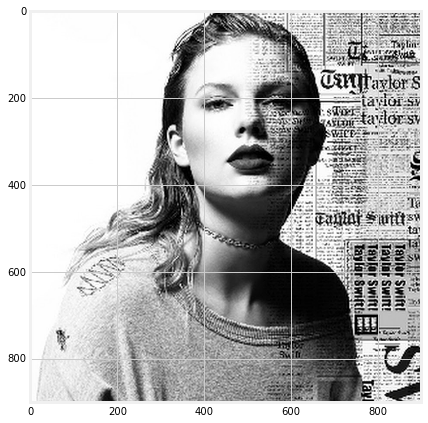

In [33]:
plt.clf()
fig = plt.figure(figsize=(7,7))


img = mpimg.imread('tswift2.jpg')
imgplot = plt.imshow(img)
width = img.shape[0]
length = img.shape[1]
print(img.shape)

# The line

### The line is not how we invisioned it yet. The program will take the line and plot the verticle distance from each point on the line to the fractal edge. Only DIRECTLY in the y direction. And Up. Note that this is in the negative y direction, because the image is created with a 2D matrix where 0,0 is the top left.

## Instructions:
1. Run the next cell
1. Click twice for your end points, the first click will NOT show a marker, just remember where you click.
1. Once you see your line, click the top right "power" button for the plot. This will save the line info.

###  NOTE: Clicking more times will draw more segments at the moment, this program ONLY looks at the first and last points as endpoints, nothing in between. 

<IPython.core.display.Javascript object>


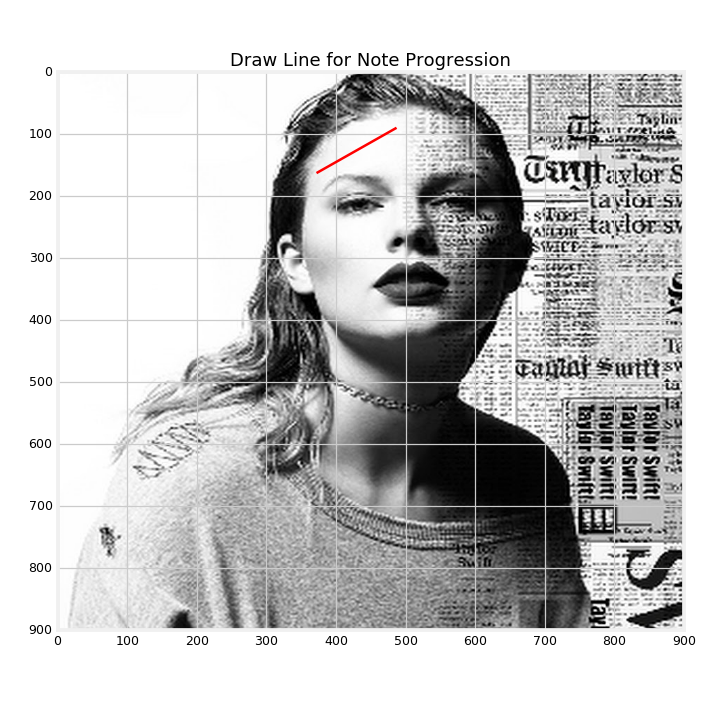

In [56]:
%matplotlib nbagg
class LineBuilder:
    pos_list = []
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(int(event.xdata))
        self.ys.append(int(event.ydata))
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        

pos_list = []        
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title('Draw Line for Note Progression')
ax.set_xlim([0, length])
ax.set_ylim([width,0])
ax.imshow(img, aspect='auto')
line, = ax.plot([], [], c='red', linewidth = 2)  # empty line
linebuilder = LineBuilder(line)

In [151]:
print(len(linebuilder.xs), len(linebuilder.ys)) #excute this line to check your endpoints.



2 2


In [57]:
d = [] #empty list for distances
m = float(linebuilder.ys[-1]-linebuilder.ys[0])/float(linebuilder.xs[-1]-linebuilder.xs[0]) #slope of your line

x_list = []
y_list = []

# print(round(linebuilder.ys[0]+(linebuilder.xs[-1]-linebuilder.xs[0])*m))
for i in range(int(abs(linebuilder.xs[0]-linebuilder.xs[-1]))): #loop through x points and find the distance in y to the fractal edge
    x = round(linebuilder.xs[0]+i)  #we have to round because. Pixels.
    y = round(linebuilder.ys[0]+i*m)
    x_list.append(x)
    y_list.append(y)
#     print(x,y)
    yi = y
    while (y>0): 
#         print(str(y)+'      ' + str(img[x][y][0]))
        if img[y][x][2] >= 0.1:  #if the pixel is white, move toward the boarder (TOP) NOTE: y axis is flipped
            y -= 1
        else: #if black, done, add this distance to the list and break out of loop
            break
    d.append(abs(yi-y))

In [36]:
print(len(d))
print(abs(linebuilder.xs[0]-linebuilder.xs[-1]))


116
116


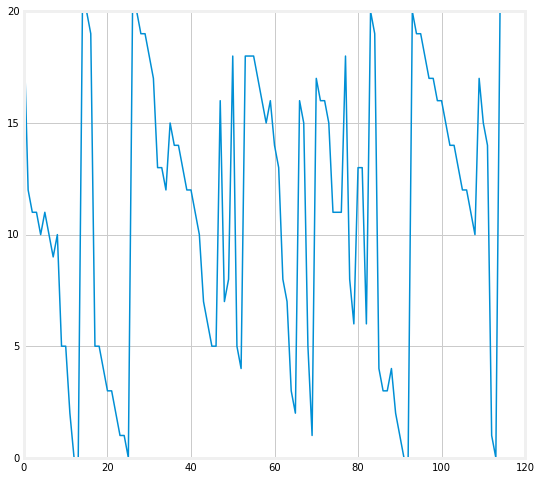

In [58]:
%matplotlib notebook
%matplotlib inline
plt.clf()
fig = plt.figure(figsize=(8,8))
nd = [x%21 for x in d] # add a modular operation to the first x here to limit range. [x%14 for x in d] will give 2 octaves
plt.plot([i for i in range(int(abs(linebuilder.xs[0]-linebuilder.xs[-1])))],nd, lw=1.5)
plt.show()

In [7]:
from psonic import *
import random

In [22]:
#key of E minor E, Fs, G, A, B, C, and D
ab_major = [Eb3,F3,G3,Ab3,Bb3,C3,Db3,Eb4,F4,G4,Ab4,Bb4,C4,Db4,Eb5,F5,G5,Ab5,Bb5,C5,Db5]
e_minor = [E3,Fs3,G3,A3,B3,C3,D3,E4,Fs4,G4,A4,B4,C4,D4,E5,Fs5,G5,A5,B5,C5,D5]  # sharps should be like this: Fs5
c_major = [C3,D3,E3,F3,G3,A3,B3,C4,D4,E4,F4,G4,A4,B4,C5,D5,E5,F5,G5,A5,B5]

#Ab progression Ab – Fm – Db – Eb
Ab_Chord = [[Ab3,MAJOR],[F3,MINOR],[Db3,MAJOR],[Eb3,MAJOR]]



In [59]:
note_list = [nd[0]]  #need first note,duration for comparison
duration_list = [0.25]

for x in nd:
    if note_list[-1] == x: #if the last note was the same as this one, use random number to determine if new note or not
        if random.random() >= 0.4: # if true, make the previous note longer, don't add a new note
            duration_list[-1] += 0.25
        else: #add a new note
            duration_list.append(0.25)
            note_list.append(x)
    else: #if the previous note was different, always add a new note.
        note_list.append(x)
        duration_list.append(0.25)
        
print(len(note_list))

101


In [145]:
#for random durations
key = ab_major
note_list = [nd[0]]  #need first note,duration for comparison
duration_list = [random.choice([0.25,0.25,0.25,0.5,0.75,1,1.5])]

for x in nd:
    if note_list[-1] == x: #if the last note was the same as this one, use random number to determine if new note or not
        if random.random() >= 0.4: # if true, make the previous note longer, don't add a new note
            duration_list[-1] += 0.25
        else: #add a new note
            duration_list.append(random.choice([0.25,0.25,0.25,0.5,0.75,1,1.5]))
            note_list.append(x)
    else: #if the previous note was different, always add a new note.
        note_list.append(x)
        duration_list.append(random.choice([0.25,0.25,0.25,0.5,0.75,1,1.5]))

NameError: name 'ab_major' is not defined

In [122]:
use_synth(SAW)
d_length = 0
j=0
for i in range(int(np.sum(duration_list)*4)):
    if i%8 == 0:
        play(random.choice(Ab_Chord[int(i/8)%4]),release = 2)
    if d_length == 0:
        j += 1
        play([ab_major[note_list[j]]])
        d_length = duration_list[j]
    sleep(0.25)
    d_length -= 0.25
    
        

KeyboardInterrupt: 

In [61]:
use_synth(SAW) #set the instrument

for i in range(len(note_list)): #iterate through lists and play notes
    play(ab_major[note_list[i]])
    sleep(duration_list[i])

KeyboardInterrupt: 

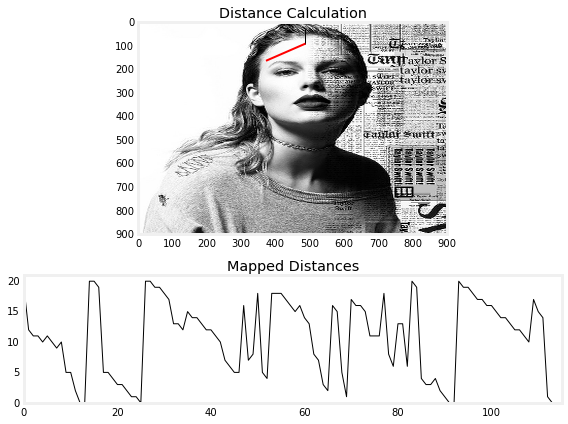

In [60]:
%matplotlib inline

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((5, 5), (0, 1), colspan=3, rowspan = 3)
ax1.set_title('Distance Calculation')
ax1.imshow(img, aspect='auto')
ax1.set_xlim([0, length])
ax1.set_ylim([width,0])

ax2 = plt.subplot2grid((5, 5), (3, 0), colspan=5, rowspan = 2)
ax2.set_title('Mapped Distances')
ax2.set_xlim([0, len(d)])
ax2.set_ylim([0,21])
ax1.grid(False)
ax2.grid(False)

line, = ax1.plot([],[],lw=1, color = 'black')
scatter, = ax2.plot([],[],lw = 1, color = 'black')
melody_line, = ax1.plot([linebuilder.xs[0],linebuilder.xs[1]],[linebuilder.ys[0],linebuilder.ys[1]],lw=2, color='red')

frame_num = len(nd)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

def init():
    line.set_data([],[])
    scatter.set_data([],[])
    return line, scatter,

def animate(i):
    x = [x_list[i],x_list[i]]
    y = [y_list[i],y_list[i]-d[i]]
    sx = [a for a in range(i)]
    sy = [nd[b] for b in range(i)]
    line.set_data(x,y)
    scatter.set_data(sx,sy)
    return line, scatter,

plt.tight_layout()

anim = animation.FuncAnimation(fig,animate,init_func = init, frames = frame_num, interval = 250, blit = True)

anim.save('lines.mp4', writer=writer)

HTML(anim.to_html5_video())